# Часть 1. Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Задание 1 ★☆☆

Изобразите график функции по заданным точкам x и y.
Подпишите оси, дайте название графику, изобразите сетку серым цветом прерывистой линией толщиной 0.3.  
Изобразите график в диапазоне $x$ от -20 до 20  и $y$ от -20 до 20.

In [2]:
t = np.linspace(-20, 20, 1000)
x = 16 * np.power(np.sin(t), 3)
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

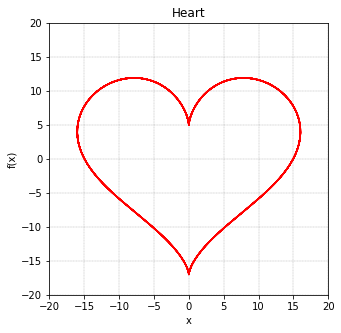

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set(xlim=(-20, 20), ylim=(-20, 20), xlabel='x', ylabel='f(x)', title='Нeart');
ax.plot(x, y, 'r')
ax.grid(color='grey', linestyle='--', linewidth=0.3)

На что похож график функции?  
Варианты в форме:
   - цветок
   - вертикальная восьмерка
   - сердечко +
   - ничего из вышеперечисленного

# Задание 2 ★★☆

Изобразите 6 графиков (2 x 3) функции  
$$f(x) = \frac{15}{\sqrt{(225 - x^2)^2 + 4z^2x^2}}$$ 
для различных значений параметра $z$.   
Для каждого графика сделайте подписи осей, нарисуйте сетку, подпишите график в соответвии со значением параметра $z$ графики должны быть достаточно разнесены, так чтобы надписи не перекрывались. Все графики должны быть в одинаковом масштабе, выберете пределы изменений для $x$ и $y$ самомтоятельно.

In [4]:
z = np.linspace(0, 1, 6)[::-1]

In [5]:
f = lambda x, z: 15 / np.sqrt((225 - x**2)**2 + 4 * z**2 * x**2)
x = np.linspace(0, 50, 1000)

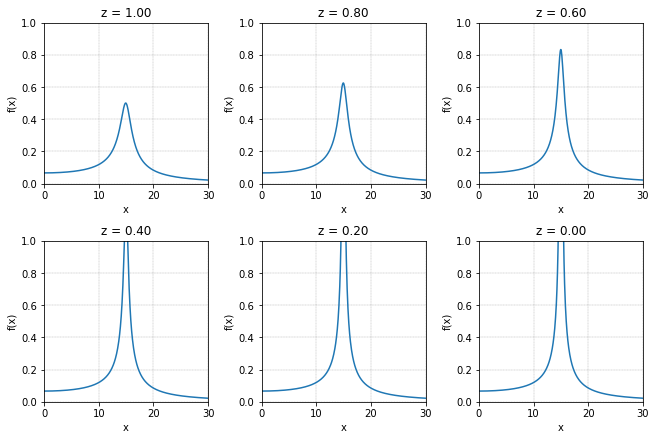

In [6]:
fig, axs = plt.subplots(2, 3, constrained_layout=True, figsize=(9, 6))
for i, ax in enumerate(axs.flatten()):
    ax.set(xlim=(0, 30), ylim=(0, 1), xlabel='x', ylabel='f(x)', title='z = {:.2f}'.format(z[i]));
    ax.plot(x, f(x, z[i]))
    ax.grid(color='grey', linestyle='--', linewidth=0.3)

[Пояснение](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B7%D0%BE%D0%BD%D0%B0%D0%BD%D1%81#/media/File:Resonance-rus.PNG)

Какое физическое явление иллюстрируют эти графики?  
Варианты в форме:
   -  биения
   -  резонанс  
   -  свободные колебания
   -  затухание

# Часть 2. Seaborn 

В этой части задания попробуйте использовать `seaborn`.

In [7]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

Проанализируем данные из уже знакомого [детесета](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

Считайте файл в переменную `data`.

In [8]:
data = pd.read_csv('data/student-mat.csv', sep=';')

In [9]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Задание  3 ★☆☆

Посмотрите на распределение девочек и мальчиков

In [10]:
data['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

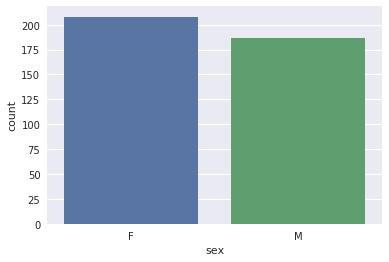

In [11]:
sns.countplot(x="sex", data=data);

В данной выборке больше:
   - девочек
   - мальчиков
   - одинаковое количество девочек и мальчиков

# Задание 4 ★☆☆

Визуализируйте распределение уровня образования родителей (матери и отца отдельно). Воспользуйтесь библиотекой `seaborn`.

In [12]:
data['Medu'].value_counts()

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

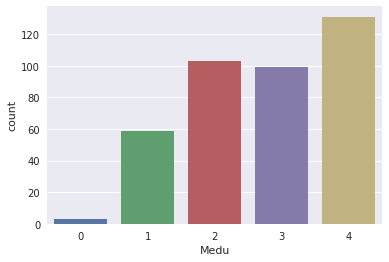

In [13]:
sns.countplot(x="Medu", data=data);

In [14]:
data['Fedu'].value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

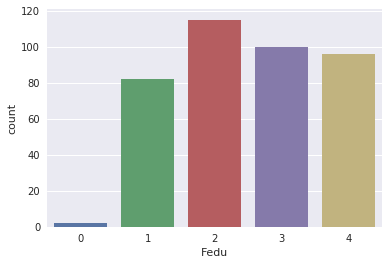

In [15]:
sns.countplot(x="Fedu", data=data);

Выберете верные утверждения:
   - среди мам больше тех, кто имеет высшее образование + 
   - среди пап больше тех, кто имеет высшее образование
   - среди пап большинство имеют 9 классов образования + 
   - среди мам большинство имеют 9 классов образования 

# Задание 5 ★★☆

Посмотрите на распределение оценок 'G3' в зависимости от желания получать высшее образования (higher). Воспользуйтесь `FacetGrid`, а затем `kdeplot` (смотри семинар), также воспользуйтесь `boxplot`.

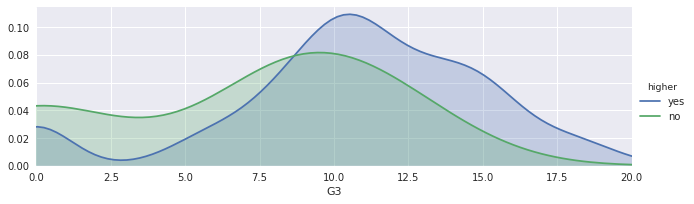

In [16]:
fg = sns.FacetGrid(data, hue="higher", aspect=3, xlim=(0, 20))
fg.map(sns.kdeplot, "G3", shade=True).add_legend();

In [17]:
data.groupby('higher')['G3'].mean()

higher
no      6.800
yes    10.608
Name: G3, dtype: float64

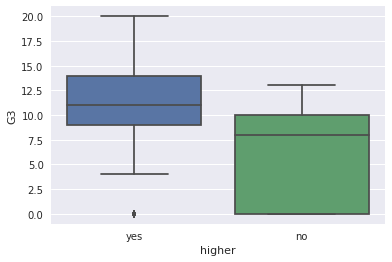

In [18]:
sns.boxplot(x="higher", y="G3", data=data);

Выберете верные утверждения:
   - медиана оценки для тех, кто хочет получать высшее образования выше, чем у остальных +
   - медиана оценки для тех, кто хочет получать высшее образования ниже, чем у остальных 
   - межквартильный размах по оценкам шире у тех, кто хочет получать высшее образования  
   - межквартильный размах по оценкам шире у тех, кто не хочет получать высшее образования  +

# Задание 6 ★★☆

Постройте `pointplot`, который отражает зависимость финальных оценок `G3` от того, кто опекун и раздельно или нет живут родители на одном графике. Отберите только те данные, для которых опекун или отец или мать.

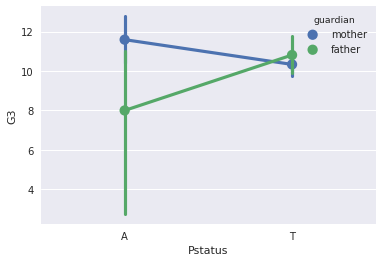

In [19]:
fg = sns.pointplot("Pstatus", "G3", data=data[data['guardian'] != 'other'], hue="guardian", col="guardian");

In [20]:
tmp = data[data['guardian'] != 'other'].groupby(['guardian', 'Pstatus']).agg({'G3': ['mean', 'median']})

In [21]:
tmp.columns = ["_".join(pair) for pair in tmp.columns]
tmp.reset_index(inplace=True)

In [22]:
tmp

,guardian,Pstatus,G3_mean,G3_median
0,father,A,8.000000,10.5
1,father,T,10.813953,11.0
2,mother,A,11.593750,11.0
3,mother,T,10.336100,11.0


In [23]:
data[data['guardian'] != 'other'].groupby('Pstatus').agg({'G3': ['mean', 'median', 'std']})

G3                 
              mean median       std
Pstatus                            
A        11.194444     11  3.904718
T        10.461774     11  4.624976

Тут важно заметить, что по графику мы точно видим только среднее (в виде точки), а не медиану и доверительный интервал (см. [документацию](https://seaborn.pydata.org/generated/seaborn.pointplot.html) "Show point estimates and confidence intervals using scatter plot glyphs")

Выберете верное утверждение:  
   - по графику видно, что среднее значение оценки выше у тех, кто воспитывается только матерью +
   - по графику видно, что медиана оценки ниже у тех, кто воспитывается только отцом +/- (из графика не очевидно, но этот ответ тоже засчитывается)
   - по графику видно, что доверительный интервал для оценок детей из полных семей меньше, чем у неполных +
   - по графику видно, что стандартное отклонение для оценок детей из неполных семей больше, чем у полных семей

# Задание 7 ★☆☆

Постройте линейную регрессию зависимости G3 от studytime (`lmplot` или `regplot`).

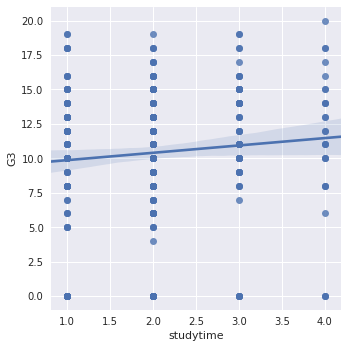

In [24]:
sns.lmplot("studytime", "G3", data);

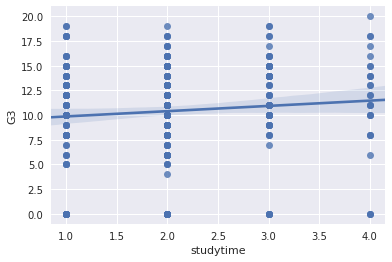

In [25]:
sns.regplot("studytime", "G3", data);

Выберете верное утверждение\ия:  
   - полученная зависимость иллюстрирует положительную зависимость между учебным временем и оценкой +
   - полученная зависимость иллюстрирует отрицательную зависимость между учебным временем и оценкой

# Задание 8 ★☆☆

Посмотрите как доступность интернета ('internet') влияет на успеваемость ('G3'). Постройте boxplot посмотрите на медиану оценок.

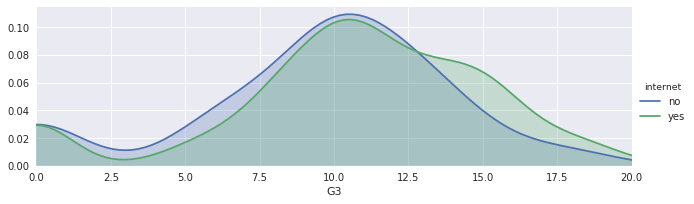

In [26]:
fg = sns.FacetGrid(data, hue="internet", aspect=3, xlim=(0, 20))
fg.map(sns.kdeplot, "G3", shade=True).add_legend();

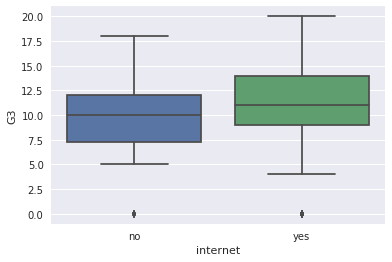

In [27]:
sns.boxplot(x="internet", y="G3", data=data);

Выберете верное утверждение\ия:
   - медиана оценки для тех, у кого есть доступ к интернету дома выше, чем у тех, у кого доступа нет  +
   - медиана оценки для тех, у кого нет доступа к интернету дома выше, чем у тех, у кого доступ есть